### 4 Getting started with neural networks
### Practice Notebook
---
*by Pablo Bauer*



#### Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i , sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
x_val  = x_train[:10000]
partial_x_train = x_train[10000:]

y_val  = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 84ms/step - loss: 0.5335 - accuracy: 0.7725 - val_loss: 0.4523 - val_accuracy: 0.8014
Epoch 2/4
30/30 [==============================] - 1s 40ms/step - loss: 0.3367 - accuracy: 0.8949 - val_loss: 0.3252 - val_accuracy: 0.8817
Epoch 3/4
30/30 [==============================] - 1s 38ms/step - loss: 0.2493 - accuracy: 0.9203 - val_loss: 0.2980 - val_accuracy: 0.8842
Epoch 4/4
30/30 [==============================] - 1s 40ms/step - loss: 0.2032 - accuracy: 0.9327 - val_loss: 0.2889 - val_accuracy: 0.8837


In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

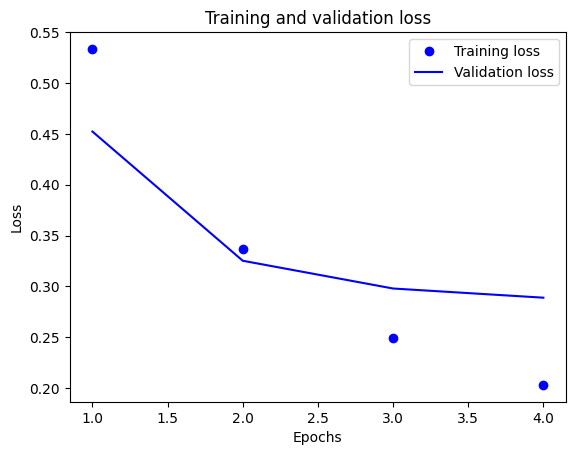

In [11]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
